In [19]:
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [20]:
data= pd.read_csv('../z_norm.csv')

### Imbalanced dataset

In [21]:
data['Loan Status'].value_counts()

Fully Paid     51276
Charged Off    16214
Name: Loan Status, dtype: int64

### split data en X et Y

In [22]:
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']



### One hot encoding

In [23]:
X= pd.get_dummies(X, drop_first= True)
Y= pd.get_dummies(Y, drop_first= True)

### balancing the data

In [ ]:
tm =TomekLinks()
X , Y = tm.fit_resample(X, Y)

In [25]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 123, stratify=Y)


In [ ]:
np.unique(Y_train, return_counts=True)


### ---KNN---

In [27]:
knn = KNeighborsClassifier()
params={'n_neighbors' : [2, 3, 4, 5, 6, 7, 8],
        'metric': ['minkowski','euclidean','manhattan']}

##accuracy
grid_search_acc= GridSearchCV(estimator=knn, param_grid= params, scoring='accuracy',cv=5, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

In [28]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 7}
----------
[[1218 2025]
 [ 560 8832]]
----------
              precision    recall  f1-score   support

           0       0.69      0.38      0.49      3243
           1       0.81      0.94      0.87      9392

    accuracy                           0.80     12635
   macro avg       0.75      0.66      0.68     12635
weighted avg       0.78      0.80      0.77     12635

----------


In [29]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=knn, param_grid= params, scoring=rec_avg,cv=5, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train)
y_predict= grid_search_rec.best_estimator_.predict(X_test)

In [30]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 2}
----------
[[2072 1171]
 [2522 6870]]
----------
              precision    recall  f1-score   support

           0       0.45      0.64      0.53      3243
           1       0.85      0.73      0.79      9392

    accuracy                           0.71     12635
   macro avg       0.65      0.69      0.66     12635
weighted avg       0.75      0.71      0.72     12635

----------


In [31]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=knn, param_grid= params, scoring=prec_avg,cv=5, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train)
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

In [32]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 7}
----------
[[1218 2025]
 [ 560 8832]]
----------
              precision    recall  f1-score   support

           0       0.69      0.38      0.49      3243
           1       0.81      0.94      0.87      9392

    accuracy                           0.80     12635
   macro avg       0.75      0.66      0.68     12635
weighted avg       0.78      0.80      0.77     12635

----------


In [38]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.set_ylim([0.65,0.80])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

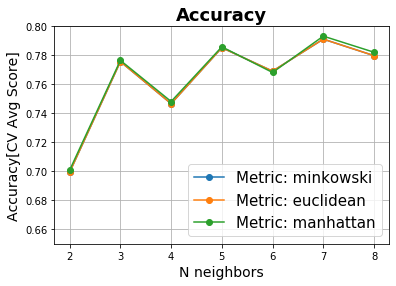

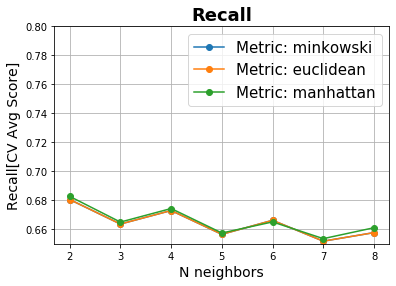

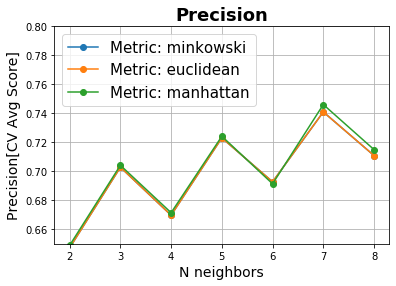

In [39]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['n_neighbors'], params['metric'], 'N neighbors', 'Metric', 'Precision')


In [ ]:
from pprint import pprint
pprint(grid_search_acc.cv_results_['mean_test_score'])
pprint(grid_search_rec.cv_results_['mean_test_score'])
pprint(grid_search_prec_avg.cv_results_['mean_test_score'])
